In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# to fetch the cleaned text data 

textdata_df = pd.read_csv('/content/drive/MyDrive/text_mining_project/naturalscience/attempt2.csv') 

textdata_df = textdata_df.dropna(how="any")

textdata = textdata_df['cleaned_Comments'].tolist()

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(textdata) 

Yresult = textdata_df['Topic'].tolist( ) 
Y = [] 
for y in Yresult: 
  if y == 'Biology': 
    Y.append(-1)
  if y == 'Physics': 
    Y.append(0)
  if y == 'Chemistry':
    Y.append(1)

In [3]:
# RandomForestClassifier, two parameters are important to look at: 
# max_depth and n_estimators 

# to split the data set into three groups, training, validation and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) 

print(len(y_train))
print(len(y_valid))
print(len(y_test))

6518
1630
2037


In [57]:
# testet 
clf = RandomForestClassifier(n_estimators=300, criterion = 'entropy', random_state = 3, max_depth= 1000)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1000, n_estimators=300,
                       random_state=3)

In [93]:
class optimisation: 
  def __init__(self, X_train, X_valid, y_train, y_valid, X_test, y_test): 
    # to optimise n_estimators and max_depth 
    self.X_train = X_train
    self.X_valid = X_valid
    self.X_test = X_test

    self.y_train = y_train
    self.y_valid = y_valid
    self.y_test = y_test 

  def optimise_max_depth(self): 
    # to generate a list of values 
    D = [x*x for x in range(1, 35)]
    train_accuracy = [ ]
    validation_accuracy = [ ] 
    for d in D:
      clf = RandomForestClassifier(n_estimators=300, criterion = 'entropy', random_state = 3, max_depth= d)
      # training model 
      clf.fit(self.X_train, self.y_train)

      # training data 
      training_precit = clf.predict(self.X_train)

      # to calcuate the classification accuracies of the training data 
      train_accuracy.append( accuracy_score(self.y_train, training_precit)) 

      # to calculate the classification accuracies of the validation data
      validation_predict = clf.predict(self.X_valid) 

      validation_accuracy.append(accuracy_score(self.y_valid, validation_predict)) 
    plt.figure(figsize=(10, 10))
    plt.plot(D, train_accuracy, color = 'maroon', linewidth=3, label='training data') 
    plt.plot(D, validation_accuracy, color = 'indigo', linewidth=3, label='validation data') 
    plt.legend(loc='upper left') 
    plt.xlabel('max depth')
    plt.ylabel('Estimated accuracies') 
    plt.grid() 

  def optimise_estimator(self): 
    E = [1, 5, 10, 50, 100, 500, 1000]
    train_accuracy = [ ]
    validation_accuracy = [ ] 
    for e in E:
      clf = RandomForestClassifier(n_estimators=e, criterion = 'entropy', random_state = 3, max_depth= 961)
      # training model 
      clf.fit(self.X_train, self.y_train)

      # training data 
      training_precit = clf.predict(self.X_train)

      # to calcuate the classification accuracies of the training data 
      train_accuracy.append( accuracy_score(self.y_train, training_precit)) 

      # to calculate the classification accuracies of the validation data
      validation_predict = clf.predict(self.X_valid) 

      validation_accuracy.append(accuracy_score(self.y_valid, validation_predict)) 
    plt.figure(figsize=(10, 10))
    plt.plot(E, train_accuracy, color = 'maroon', linewidth=3, label='training data') 
    plt.plot(E, validation_accuracy, color = 'indigo', linewidth=3, label='validation data') 
    plt.legend(loc='upper left') 
    plt.xlabel('n_estimator')
    plt.ylabel('Estimated accuracies') 
    plt.grid() 

  
    


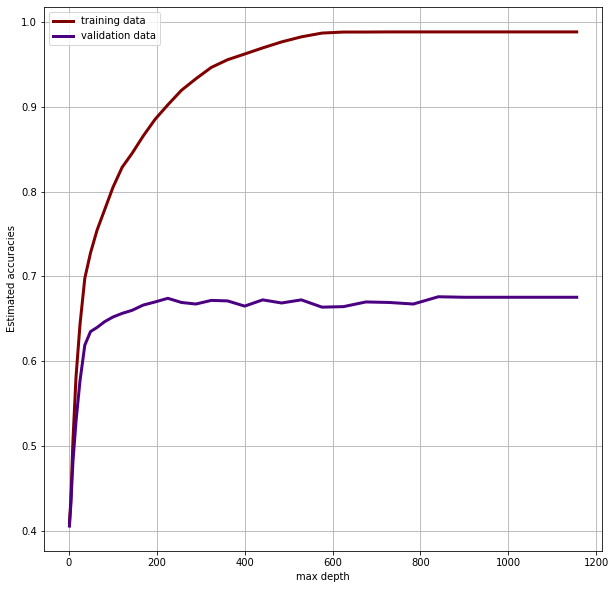

In [94]:
modeloptimal = optimisation(X_train, X_valid, y_train, y_valid, X_test, y_test)

modeloptimal.optimise_max_depth()

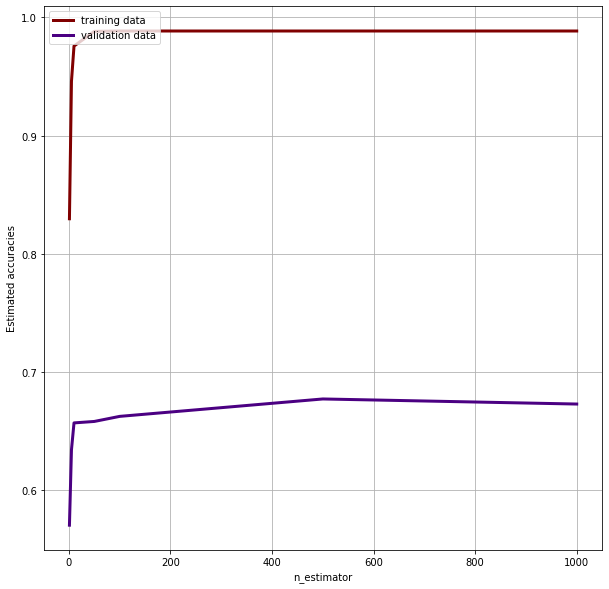

In [95]:
modeloptimal = optimisation(X_train, X_valid, y_train, y_valid, X_test, y_test)
modeloptimal.optimise_estimator( )

In [58]:
y_valid_pred = clf.predict(X_valid)

print(accuracy_score(y_valid, y_valid_pred))

0.6914110429447853


In [4]:
class optimisation: 
  def __init__(self, inputdataframe): 
    self.inputdf = inputdataframe.dropna(how="any") 
    self.textdata = inputdataframe['cleaned_Comments'].tolist()
    self.topics = inputdataframe['Topic'].tolist( )  

  def splitdata(self, e, d): 
    X = self.textdata
    Y = [ ]
    for y in self.topics: 
      if y == 'Biology': 
        Y.append(-1)
      if y == 'Physics': 
        Y.append(0)
      if y == 'Chemistry':
        Y.append(1) 

    # to split data into three different chunks 
    # to split the data set into three groups, training, validation and test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3) 

    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2) 

    pipe = Pipeline([('word2vec', CountVectorizer() ), ('randomforest', RandomForestClassifier(n_estimators=e, criterion = 'entropy', random_state = 3, max_depth= d))]) 

    pipe.fit(X_train, y_train) 
    test_score = pipe.predict(X_test)  

    test_accessment = classification_report(y_test, test_score)
    print(test_accessment) 

    # to learn which  blog posts the training model failed to predict correctly 
    L = len(X_test)

    # to create an empty list to store the wrongly predicted text data 
    wrongly_predicted_textdata = []
    wrongly_predicted_dict = { }
    for i in range(L): 
      temp1 = test_score[i]
      temp2 = y_test[i]
      if temp1 != temp2: 
        wrongly_predicted_textdata.append([X_test[i], temp1, temp2] ) 
        newlist = (temp1, temp2) 
        if newlist not in wrongly_predicted_dict:
          wrongly_predicted_dict[newlist] = 1
        else: 
          wrongly_predicted_dict[newlist] += 1

    return wrongly_predicted_dict, test_accessment 



In [6]:
model2 = optimisation(textdata_df)

dict_wrongly, test_accessment = model2.splitdata(e=500, d = 820)

              precision    recall  f1-score   support

          -1       0.73      0.72      0.72       864
           0       0.71      0.60      0.65       500
           1       0.62      0.71      0.66       673

    accuracy                           0.69      2037
   macro avg       0.69      0.68      0.68      2037
weighted avg       0.69      0.69      0.69      2037



In [7]:
dict_wrongly

{(-1, 0): 92, (-1, 1): 136, (0, -1): 61, (0, 1): 59, (1, -1): 183, (1, 0): 109}